<a href="https://colab.research.google.com/github/TheStrangeGuy/Flood-Prediction-Model/blob/main/flood_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flood prediction Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing Pandas and Numpy Libraries for manipulating our Data
import numpy as np
import pandas as pd
# For splitting our train data
from sklearn.model_selection import train_test_split
# For visualizing Data
import matplotlib.pyplot as plt
import seaborn as sns
# For training our data
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
# For scaling
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler #used for optimized performance
from sklearn.decomposition import PCA
# For evaluating end result
from sklearn.metrics import classification_report ,confusion_matrix ,ConfusionMatrixDisplay

In [ ]:
#Read the data present in dataset
data = pd.read_csv('/content/drive/MyDrive/ML_Course/kerala.csv')
#Using data.head() we can see the top 5 rows of the dataset
data.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [ ]:
# Print number of rows in data
print(data.shape)

# Size and shape of dataset
print(data.size)

(118, 15)
1770


In [ ]:
# Prints Summary of Data
data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,1959.500000,12.218644,15.633898,36.670339,110.330508,228.644915,651.617797,698.220339,430.369492,246.207627,293.207627,162.311017,40.009322,2925.405085
std,34.207699,15.473766,16.406290,30.063862,44.633452,147.548778,186.181363,228.988966,181.980463,121.901131,93.705253,83.200485,36.676330,452.169407
min,1901.000000,0.000000,0.000000,0.100000,13.100000,53.400000,196.800000,167.500000,178.600000,41.300000,68.500000,31.500000,0.100000,2068.800000
25%,1930.250000,2.175000,4.700000,18.100000,74.350000,125.050000,535.550000,533.200000,316.725000,155.425000,222.125000,93.025000,10.350000,2613.525000
50%,1959.500000,5.800000,8.350000,28.400000,110.400000,184.600000,625.600000,691.650000,386.250000,223.550000,284.300000,152.450000,31.100000,2934.300000
75%,1988.750000,18.175000,21.400000,49.825000,136.450000,264.875000,786.975000,832.425000,500.100000,334.500000,355.150000,218.325000,54.025000,3170.400000
max,2018.000000,83.500000,79.000000,217.200000,238.000000,738.800000,1098.200000,1526.500000,1398.900000,526.700000,567.900000,365.600000,202.300000,4473.000000


In [ ]:
Y = data['FLOODS']
X = data.drop(columns=['FLOODS'])

In [ ]:
data.isnull().sum()

YEAR                0
JAN                 0
FEB                 0
MAR                 0
APR                 0
MAY                 0
JUN                 0
JUL                 0
AUG                 0
SEP                 0
OCT                 0
NOV                 0
DEC                 0
 ANNUAL RAINFALL    0
FLOODS              0
dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)
print('X train shape: ', X_train.shape)
print('Y train shape: ', y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', y_test.shape)

X train shape:  (100, 14)
Y train shape:  (100,)
X test shape:  (18, 14)
Y test shape:  (18,)


In [ ]:
#Let's see how our train set looks like
X_train.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
67,1968,7.3,30.5,89.2,133.3,90.0,696.4,1308.9,380.7,325.4,178.9,119.4,32.7,3392.7
62,1963,30.2,24.8,69.8,96.3,157.1,393.3,720.2,511.0,223.9,282.6,93.4,48.4,2651.1
78,1979,2.4,30.0,11.7,42.0,127.7,582.9,662.2,383.7,211.7,163.8,261.7,23.3,2503.0
17,1918,42.9,5.0,32.8,51.3,683.0,464.3,167.5,376.0,96.4,233.2,295.4,54.1,2501.9
82,1983,0.2,1.5,0.9,13.1,76.0,322.8,583.2,579.9,421.1,136.2,116.5,69.1,2320.3


In [ ]:
y_train.head()

67    YES
62     NO
78     NO
17     NO
82     NO
Name: FLOODS, dtype: object

# Prediction Algorithms:

# 1. Random Forest Classifier

**RF using MinMax Scalar.**

              precision    recall  f1-score   support

  Predicated       1.00      0.60      0.75         5
      Actual       0.87      1.00      0.93        13

    accuracy                           0.89        18
   macro avg       0.93      0.80      0.84        18
weighted avg       0.90      0.89      0.88        18



<Axes: >

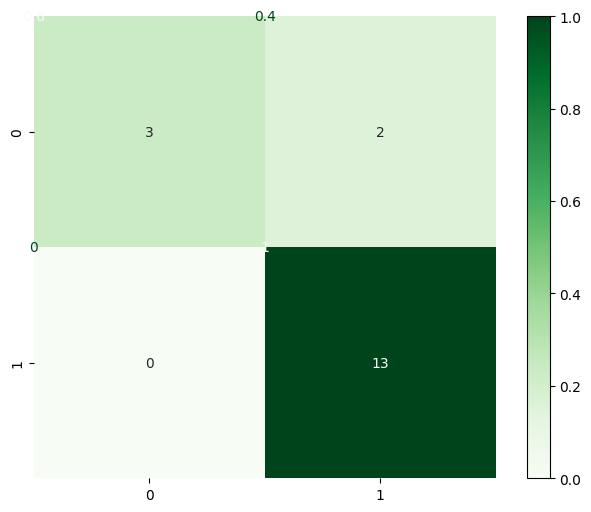

In [ ]:
mms = MinMaxScaler()
X_train_min = mms.fit_transform(X_train)
X_test_min = mms.fit_transform(X_test)

# We define the model
rfcla = RandomForestClassifier(n_estimators=100,random_state=9,n_jobs=4)

# We train model
rfcla.fit(X_train_min, y_train)

# We predict target values
Y_predict5 = rfcla.predict(X_test_min)

target_names = ['Predicated','Actual']
print(classification_report(y_test, Y_predict5.reshape(-1,1), target_names=target_names))

cm = confusion_matrix(y_test, Y_predict5.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Greens')

conf_mat = confusion_matrix(y_test, Y_predict5)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Greens', fmt='d', cbar=False)


**RF using PCA Scalar.**

              precision    recall  f1-score   support

  Predicated       0.20      0.40      0.27         5
      Actual       0.62      0.38      0.48        13

    accuracy                           0.39        18
   macro avg       0.41      0.39      0.37        18
weighted avg       0.51      0.39      0.42        18



<Axes: >

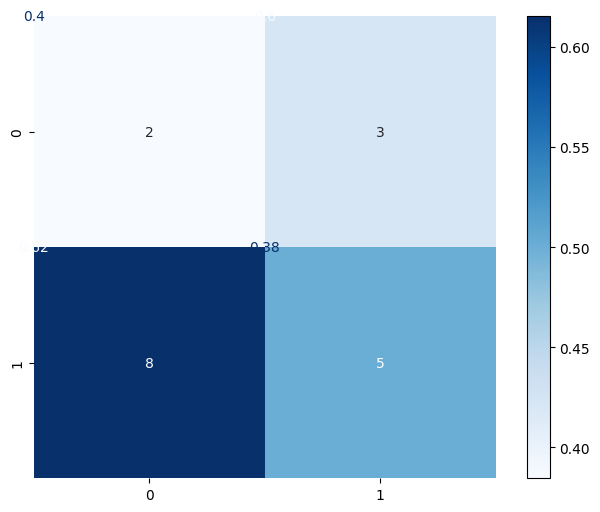

In [ ]:
independent_scaler= StandardScaler()
X_train_norm = independent_scaler.fit_transform(X_train)
X_test_norm = independent_scaler.fit_transform(X_test)

pca =PCA(n_components =2 )
# Convert all the columns into two components / columns
X_train_pca = pca.fit_transform(X_train_norm)
X_train_pca = pca.transform(X_train_norm)
X_test_pca  = pca.fit_transform(X_test_norm)
X_test_pca = pca.transform(X_test_norm)


# We define the model
rfcla = RandomForestClassifier(n_estimators=100,random_state=9,n_jobs=4)

# We train model
rfcla.fit(X_train_pca, y_train)

# We predict target values
Y_predict5 = rfcla.predict(X_test_pca)

target_names = ['Predicated','Actual']
print(classification_report(y_test, Y_predict5.reshape(-1,1), target_names=target_names))

cm = confusion_matrix(y_test, Y_predict5.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')

conf_mat = confusion_matrix(y_test, Y_predict5)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

# 2. K-Nearest Neighbour Classifier

**KNN using MinMaxScalar.**

              precision    recall  f1-score   support

  Predicated       0.71      1.00      0.83         5
      Actual       1.00      0.85      0.92        13

    accuracy                           0.89        18
   macro avg       0.86      0.92      0.88        18
weighted avg       0.92      0.89      0.89        18



<Axes: >

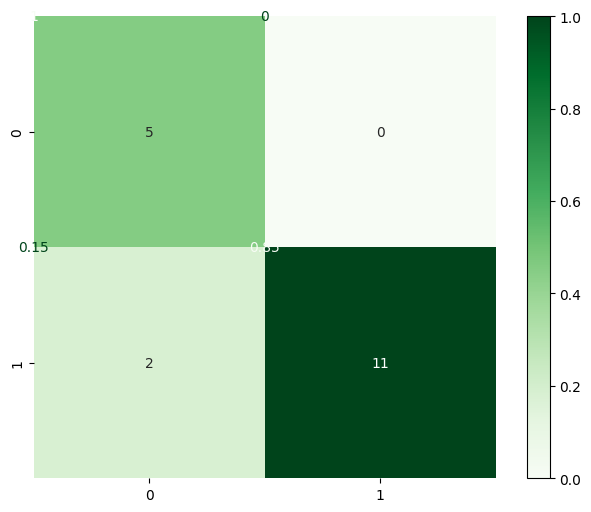

In [ ]:
mms = MinMaxScaler()
X_train_min = mms.fit_transform(X_train)
X_test_min = mms.fit_transform(X_test)

# Define KNN Model
knn = KNeighborsClassifier(n_neighbors=3, metric="minkowski")
# We fit our model with our train data
knn.fit(X_train_min, y_train)
# Then predict results from X_test data
pred_knn = knn.predict(X_test_min)
target_names = ['Predicated','Actual']
print(classification_report(y_test, pred_knn.reshape(-1,1), target_names=target_names))

cm = confusion_matrix(y_test, pred_knn.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Greens')

conf_mat = confusion_matrix(y_test, pred_knn)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Greens', fmt='d', cbar=False)

**KNN using PCA Scalar.**

              precision    recall  f1-score   support

  Predicated       0.20      0.40      0.27         5
      Actual       0.62      0.38      0.48        13

    accuracy                           0.39        18
   macro avg       0.41      0.39      0.37        18
weighted avg       0.51      0.39      0.42        18



<Axes: >

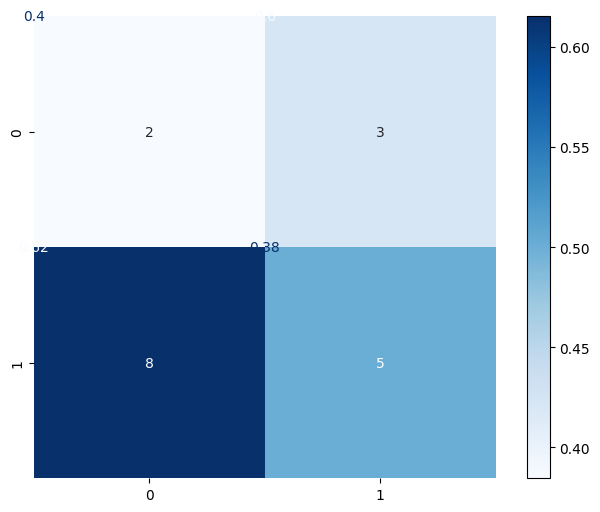

In [ ]:
# Define KNN Model
knn = KNeighborsClassifier(n_neighbors=3, metric="minkowski")
# We fit our model with our train data
knn.fit(X_train_pca, y_train)
# Then predict results from X_test data
pred_knn = knn.predict(X_test_pca)
target_names = ['Predicated','Actual']
print(classification_report(y_test, pred_knn.reshape(-1,1), target_names=target_names))

cm = confusion_matrix(y_test, pred_knn.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')

conf_mat = confusion_matrix(y_test, pred_knn)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

# 3. Decision tree classification

**DT using MinMaxScalar.**

              precision    recall  f1-score   support

  Predicated       0.60      0.60      0.60         5
      Actual       0.85      0.85      0.85        13

    accuracy                           0.78        18
   macro avg       0.72      0.72      0.72        18
weighted avg       0.78      0.78      0.78        18



<Axes: >

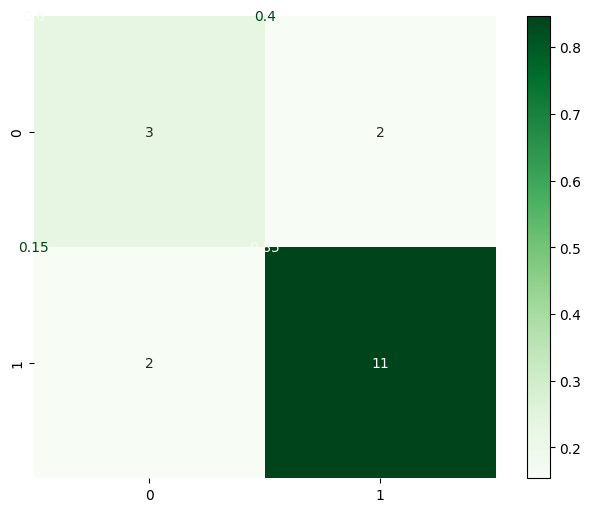

In [ ]:
dt = DecisionTreeClassifier()
X_train_min = mms.fit_transform(X_train)
X_test_min = mms.fit_transform(X_test)
# We fit our model with our train data
dt.fit(X_train_min, y_train)
# Then predict results from X_test data
pred_dt = dt.predict(X_test_min)


target_names = ['Predicated','Actual']
print(classification_report(y_test, pred_dt.reshape(-1,1), target_names=target_names))

cm = confusion_matrix(y_test, pred_dt.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Greens')

conf_mat = confusion_matrix(y_test, pred_dt)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Greens', fmt='d', cbar=False)

**DT using PCA Scalar.**

              precision    recall  f1-score   support

  Predicated       0.20      0.40      0.27         5
      Actual       0.62      0.38      0.48        13

    accuracy                           0.39        18
   macro avg       0.41      0.39      0.37        18
weighted avg       0.51      0.39      0.42        18



<Axes: >

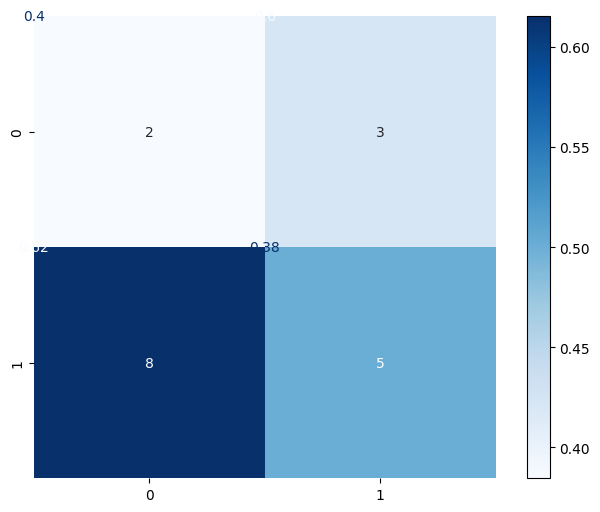

In [ ]:
# Define Decision Tree Model
dt = DecisionTreeClassifier()

dt.fit(X_train_pca, y_train)
# Then predict results from X_test data
pred_dt = dt.predict(X_test_pca)

target_names = ['Predicated','Actual']
print(classification_report(y_test, pred_dt.reshape(-1,1), target_names=target_names))

cm = confusion_matrix(y_test, pred_dt.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')

conf_mat = confusion_matrix(y_test, pred_dt)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

# Comparing all the prediction models

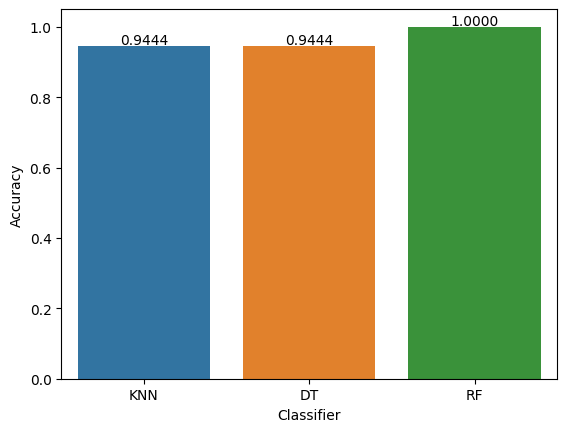

In [ ]:
models = []

from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))

names = []
scores = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})

axis = sns.barplot(x = 'Name', y = 'Score', data =tr_split )
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center")

plt.show()